#**TELECOM X - PARTE 2: PREDICIÓN DE CANCELACIÓN**
##Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

##**A. Ajustando los Datos**

###**1.  Extracción de Datos**



In [52]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

url ='https://raw.githubusercontent.com/ro-kazz/Challenge-DS-LATAM-TelecomX-P2/refs/heads/main/datos_preparados.csv'

datos = pd.read_csv(url)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.015,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.014,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.017,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.022,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.019,83.9,267.40


In [53]:
datos = datos.drop('customerID', axis=1)


### **2. Verificación de Datos**

In [54]:
# Información básica
print("=== Información general del DataFrame ===")
print(datos.info())

print("\n=== Descripción general de todas las columnas ===")
print(datos.describe(include='all'))

# Identificar variables numéricas y categóricas
numericas = datos.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = datos.select_dtypes(include=['object']).columns.tolist()

# Ajuste: incluir variables binarias que deben ser categóricas
binarias_categoricas = ['SeniorCitizen']

for col in binarias_categoricas:
    if col in numericas:
        numericas.remove(col)
    if col not in categoricas:
        categoricas.append(col)

print("\n=== Variables numéricas ===")
print(numericas)

print("\n=== Variables categóricas ===")
print(categoricas)



=== Información general del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  


=== Churn ===


,Frecuencia,Porcentaje
Churn,,
No,5174,73.46
Yes,1869,26.54


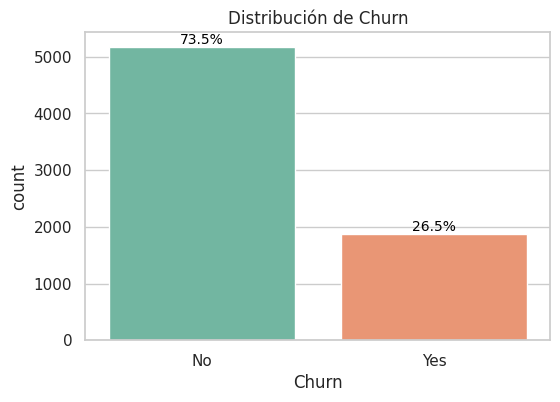


=== gender ===


,Frecuencia,Porcentaje
gender,,
Male,3555,50.48
Female,3488,49.52


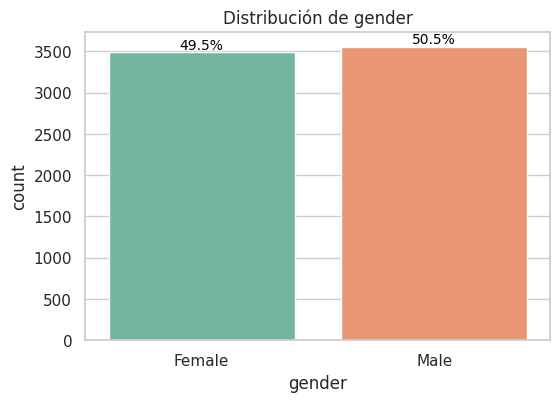


=== Partner ===


,Frecuencia,Porcentaje
Partner,,
No,3641,51.7
Yes,3402,48.3


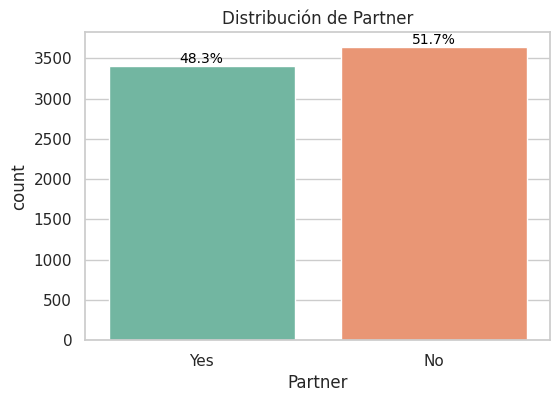


=== Dependents ===


,Frecuencia,Porcentaje
Dependents,,
No,4933,70.04
Yes,2110,29.96


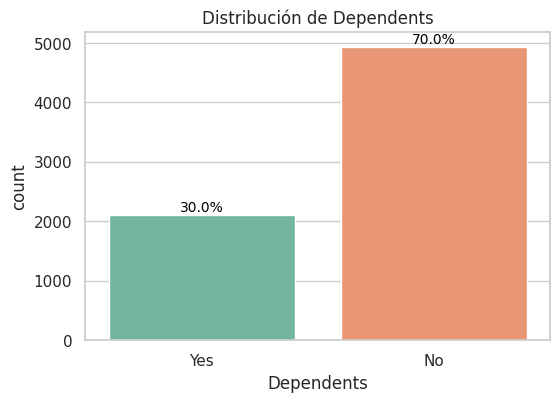


=== PhoneService ===


,Frecuencia,Porcentaje
PhoneService,,
Yes,6361,90.32
No,682,9.68


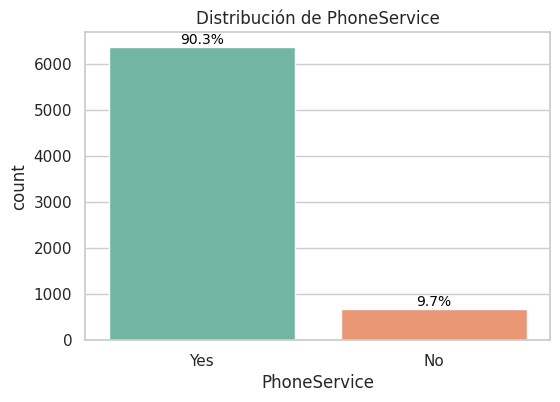


=== MultipleLines ===


,Frecuencia,Porcentaje
MultipleLines,,
No,3390,48.13
Yes,2971,42.18
No phone service,682,9.68


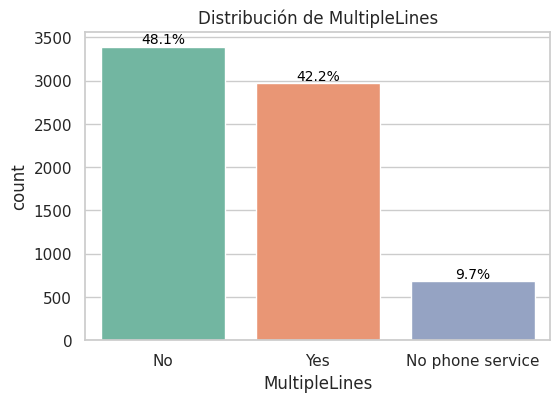


=== InternetService ===


,Frecuencia,Porcentaje
InternetService,,
Fiber optic,3096,43.96
DSL,2421,34.37
No,1526,21.67


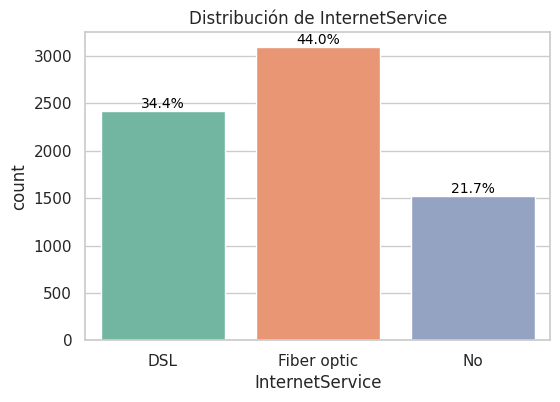


=== OnlineSecurity ===


,Frecuencia,Porcentaje
OnlineSecurity,,
No,3498,49.67
Yes,2019,28.67
No internet service,1526,21.67


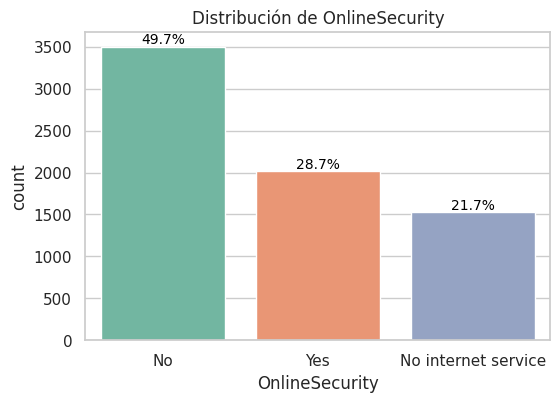


=== OnlineBackup ===


,Frecuencia,Porcentaje
OnlineBackup,,
No,3088,43.84
Yes,2429,34.49
No internet service,1526,21.67


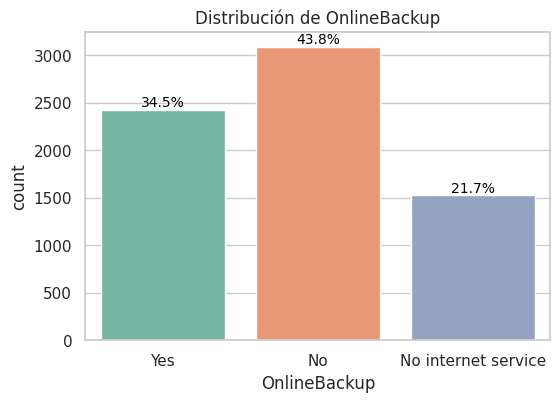


=== DeviceProtection ===


,Frecuencia,Porcentaje
DeviceProtection,,
No,3095,43.94
Yes,2422,34.39
No internet service,1526,21.67


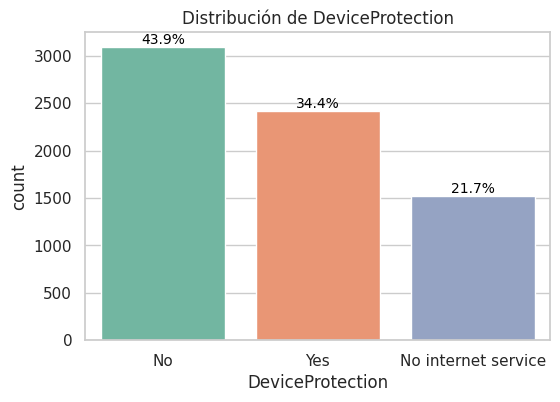


=== TechSupport ===


,Frecuencia,Porcentaje
TechSupport,,
No,3473,49.31
Yes,2044,29.02
No internet service,1526,21.67


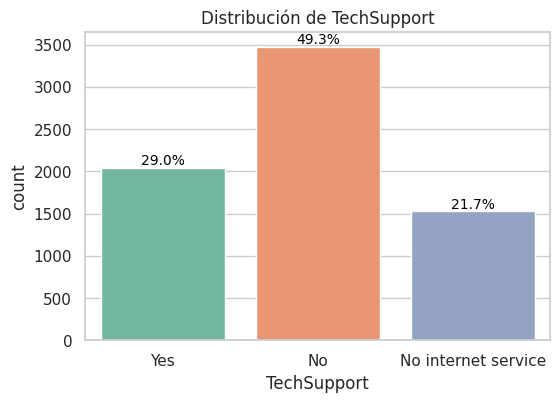


=== StreamingTV ===


,Frecuencia,Porcentaje
StreamingTV,,
No,2810,39.90
Yes,2707,38.44
No internet service,1526,21.67


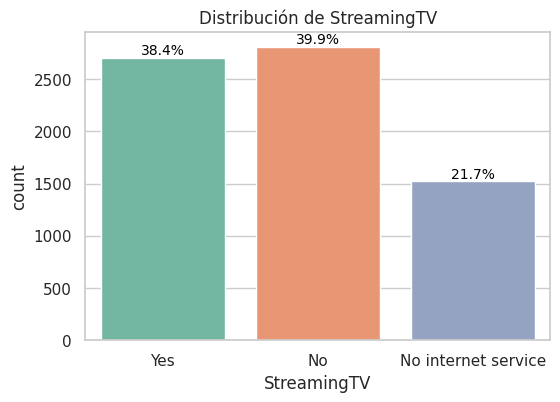


=== StreamingMovies ===


,Frecuencia,Porcentaje
StreamingMovies,,
No,2785,39.54
Yes,2732,38.79
No internet service,1526,21.67


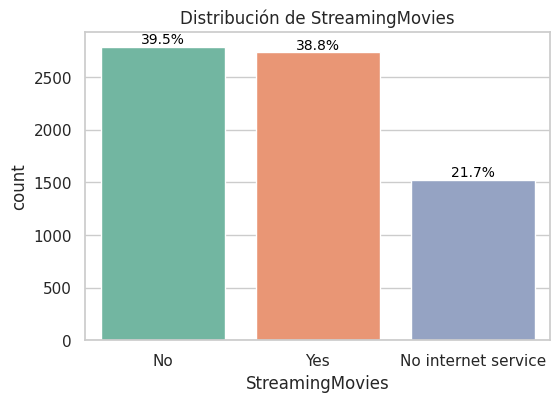


=== Contract ===


,Frecuencia,Porcentaje
Contract,,
Month-to-month,3875,55.02
Two year,1695,24.07
One year,1473,20.91


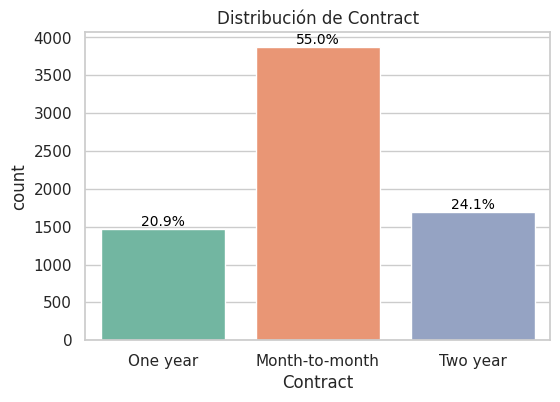


=== PaperlessBilling ===


,Frecuencia,Porcentaje
PaperlessBilling,,
Yes,4171,59.22
No,2872,40.78


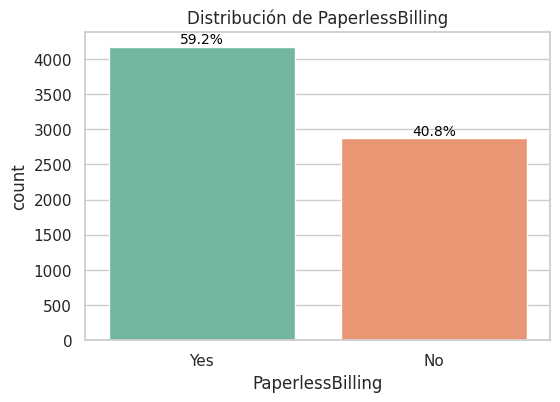


=== PaymentMethod ===


,Frecuencia,Porcentaje
PaymentMethod,,
Electronic check,2365,33.58
Mailed check,1612,22.89
Bank transfer,1544,21.92
Credit card,1522,21.61


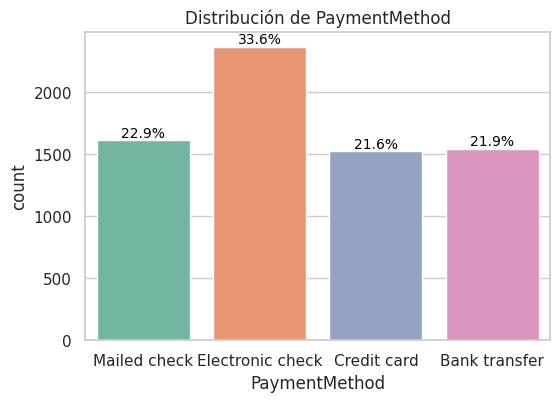


=== SeniorCitizen ===


,Frecuencia,Porcentaje
SeniorCitizen,,
0,5901,83.79
1,1142,16.21


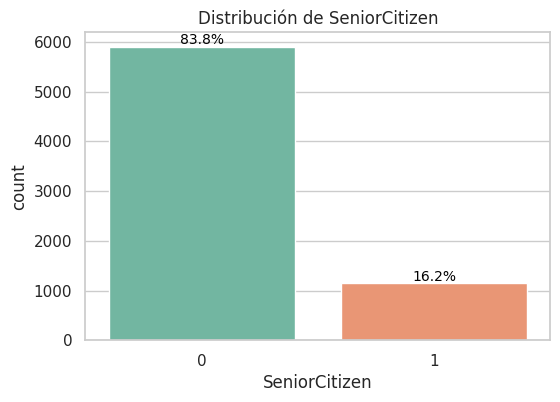


=== Estadísticas descriptivas de variables numéricas ===


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.000,9.000,29.000,55.000,72.000
Charges.Daily,7043.0,0.014809,0.006842,0.004,0.008,0.016,0.021,0.027
Charges.Monthly,7043.0,64.761692,30.090047,18.250,35.500,70.350,89.850,118.750
Charges.Total,7043.0,2279.734304,2266.794470,0.000,398.550,1394.550,3786.600,8684.800


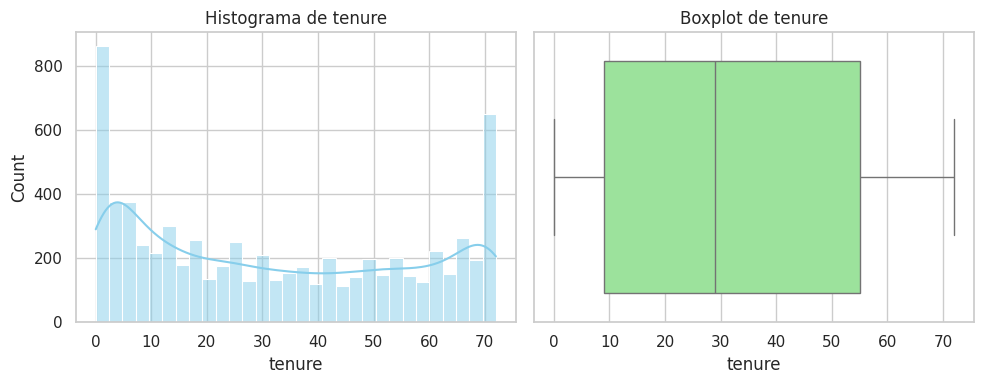

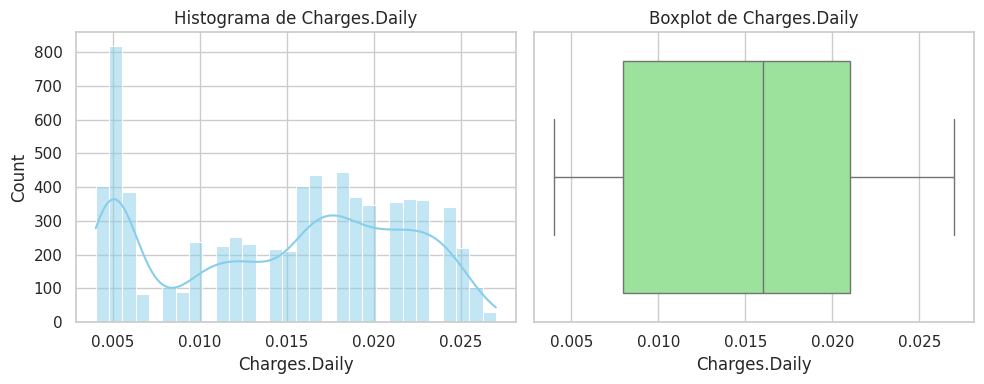

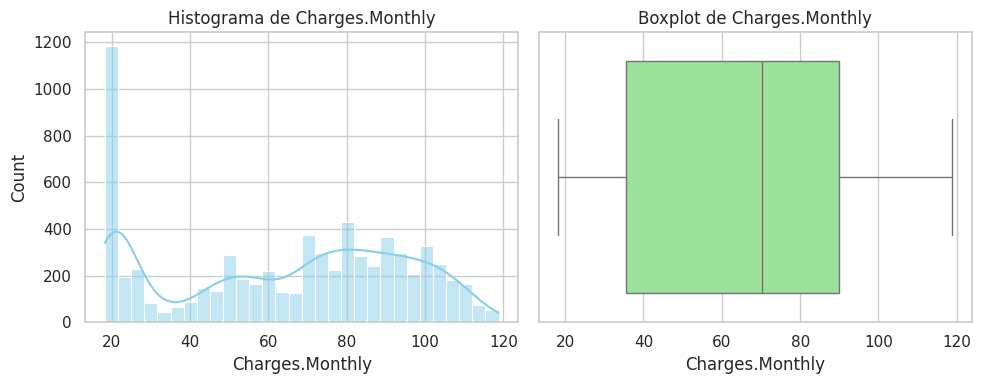

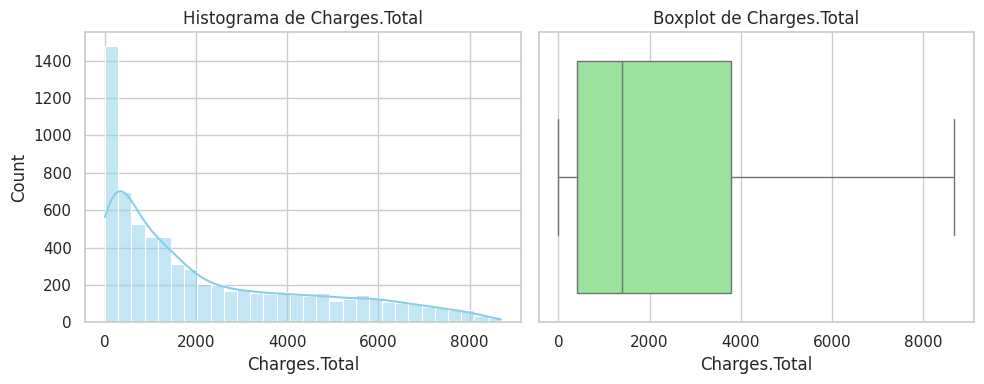

In [55]:
# Exploración descriptiva de variables categóricas y numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Variables categóricas ===
for col in categoricas:
    print(f"\n=== {col} ===")
    frec_abs = datos[col].value_counts()
    frec_rel = datos[col].value_counts(normalize=True) * 100
    display(pd.DataFrame({"Frecuencia": frec_abs, "Porcentaje": frec_rel.round(2)}))

    # Gráfico de barras con porcentajes
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=datos, x=col, palette="Set2")

    # Añadir porcentajes encima de cada barra
    total = len(datos[col])
    for p in ax.patches:
        porcentaje = f'{100 * p.get_height()/total:.1f}%'
        ax.annotate(porcentaje,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Distribución de {col}")
    plt.show()


# === 2. Variables numéricas ===
print("\n=== Estadísticas descriptivas de variables numéricas ===")
display(datos[numericas].describe().T)

for col in numericas:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    # Histograma
    sns.histplot(datos[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histograma de {col}")

    # Boxplot
    sns.boxplot(x=datos[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


##**B. Preparación de lo datos: Encoding, Creacion de Varialbles y Vista Inicial de Correlación**
Objetivo: Garantizar que el dataset esté listo para ser usado por distintos modelos de ML.

###1.Instalacion de bibliotecas

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


###2.Codificación con get_dummies y correlaciones
Construccion basada en el aseguramiento de no uso de variable objetivo 'Churn'

In [57]:
#Reconstruir listas categóricas/numéricas (por si no existen)
numericas = datos.select_dtypes(include=['int64','float64']).columns.tolist()
categoricas = datos.select_dtypes(include=['object']).columns.tolist()

# Mover binarias conceptuales a categóricas (si vinieran como numéricas)
bin_cat = ['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']
for c in bin_cat:
    if c in datos.columns:
        if c in numericas:
            numericas.remove(c)
        if c not in categoricas:
            categoricas.append(c)
# Asegurar que 'Churn' NO entre a get_dummies (la tratamos aparte como target)
if 'Churn' in categoricas:
    categoricas.remove('Churn')

# Asegurar target como categórico 'Yes'/'No' (si vino 0/1)
if datos['Churn'].dtype != 'O':
    datos['Churn'] = datos['Churn'].map({1:'Yes', 0:'No'})

In [58]:
#OHE con get_dummies (EXCLUYENDO el target)
cat_for_dummies = [c for c in categoricas if c != 'Churn']
datos_codificados = pd.get_dummies(data=datos, columns=cat_for_dummies, dtype=int)

#Crear target numérico para ML y correlación
datos_codificados['Churn_bin'] = datos['Churn'].map({'Yes':1,'No':0}).astype(int)

###3.Definicion y creación de variables de entrenamiento

In [59]:
#Definir X/y (toda la matriz es numérica)
feature_cols = [c for c in datos_codificados.columns if c not in ['Churn','Churn_bin']]
X_full = datos_codificados[feature_cols]
y_full = datos_codificados['Churn_bin']

In [60]:
#Split 70/30 estratificado
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.30, random_state=42, stratify=y_full
)
print(f"Shapes -> X_train_full: {X_train_full.shape}, X_test_full: {X_test_full.shape}")

Shapes -> X_train_full: (4930, 47), X_test_full: (2113, 47)


###4.Definicion y creación de variables de entrenamiento para modelos escalados

In [61]:
#StandardScaler (ajustar en train, aplicar en test)
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train_full)
X_test_scaled_np  = scaler.transform(X_test_full)

# Reconstruir DataFrames escalados con nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_full.columns, index=X_train_full.index)
X_test_scaled  = pd.DataFrame(X_test_scaled_np,  columns=X_test_full.columns,  index=X_test_full.index)

###5.Correlacion de datos respecto al Churn


In [62]:
# Correlaciones SOBRE DATOS NORMALIZADOS
corr_mat = pd.concat([X_train_scaled, y_train.rename('Churn_bin')], axis=1).corr()
target_corr = corr_mat['Churn_bin'].drop('Churn_bin', errors='ignore').sort_values(key=lambda s: s.abs(), ascending=False)

print("\n=== Top 25 correlaciones (|r|) con Churn_bin (set de entrenamiento, normalizado) ===")
display(target_corr.head(25).to_frame('Corr Churn').round(3))


=== Top 25 correlaciones (|r|) con Churn_bin (set de entrenamiento, normalizado) ===


,Corr Churn
Contract_Month-to-month,0.413
tenure,-0.359
TechSupport_No,0.340
OnlineSecurity_No,0.335
PaymentMethod_Electronic check,0.306
Contract_Two year,-0.301
InternetService_Fiber optic,0.301
OnlineBackup_No,0.270
DeviceProtection_No,0.252
OnlineSecurity_No internet service,-0.225


##**C. Correlación y Selección de Variables**

###**1.Visión general de correlaciones numéricas**
Objetivo: Matriz de Correlación (numéricas): detectar variables con relación más fuerte con Churn y entre sí.


---



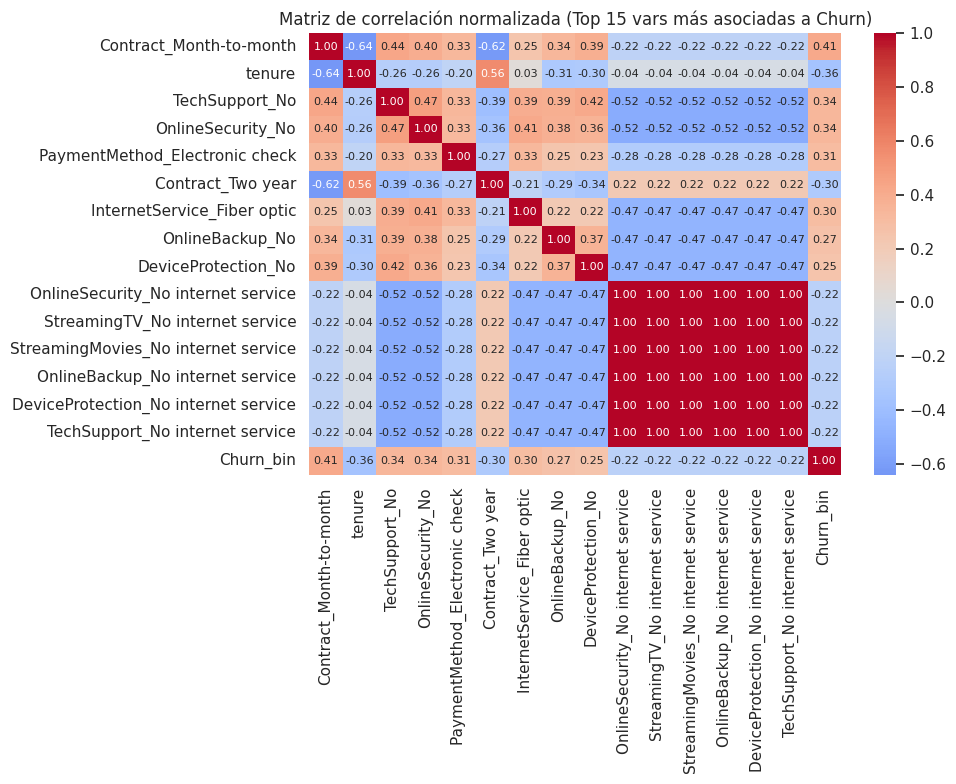

In [96]:
# Heatmap de las Top-K variables más asociadas al target
K = 15
topk = target_corr.head(K).index.tolist() + ['Churn_bin']
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_mat.loc[topk, topk],
    annot=True, fmt=".2f", cmap="coolwarm", center=0, annot_kws={'fontsize': 8}
)
plt.title(f"Matriz de correlación normalizada (Top {K} vars más asociadas a Churn)")
plt.tight_layout()
plt.show()

**Codificación & correlaciones:**
La correlación vs. Churn muestra qué variables están más asociadas con la cancelación.

Nota típica del dominio: tenure y Charges.Total suelen correlacionar positivamente entre sí (clientes antiguos acumulan más gasto), y algunos dummies de contrato/método de pago/servicios destacan por su relación directa con churn.


---



###**2.Análisis dirigido de variables clave vs. Churn.**
Objetivo es revisar patrones entre Churn y variables estratégicas como:
*   `Contract × Churn` → Confirmar si la permanencia contractual influye en cancelaciones.
*   `Charges.Total × Churn` → Confirmar cuánto gastan quienes cancelan vs quienes no.
*   `tenure × Churn` → Confirmar si la antigüedad del cliente reduce o incrementa la tasa de abandono.





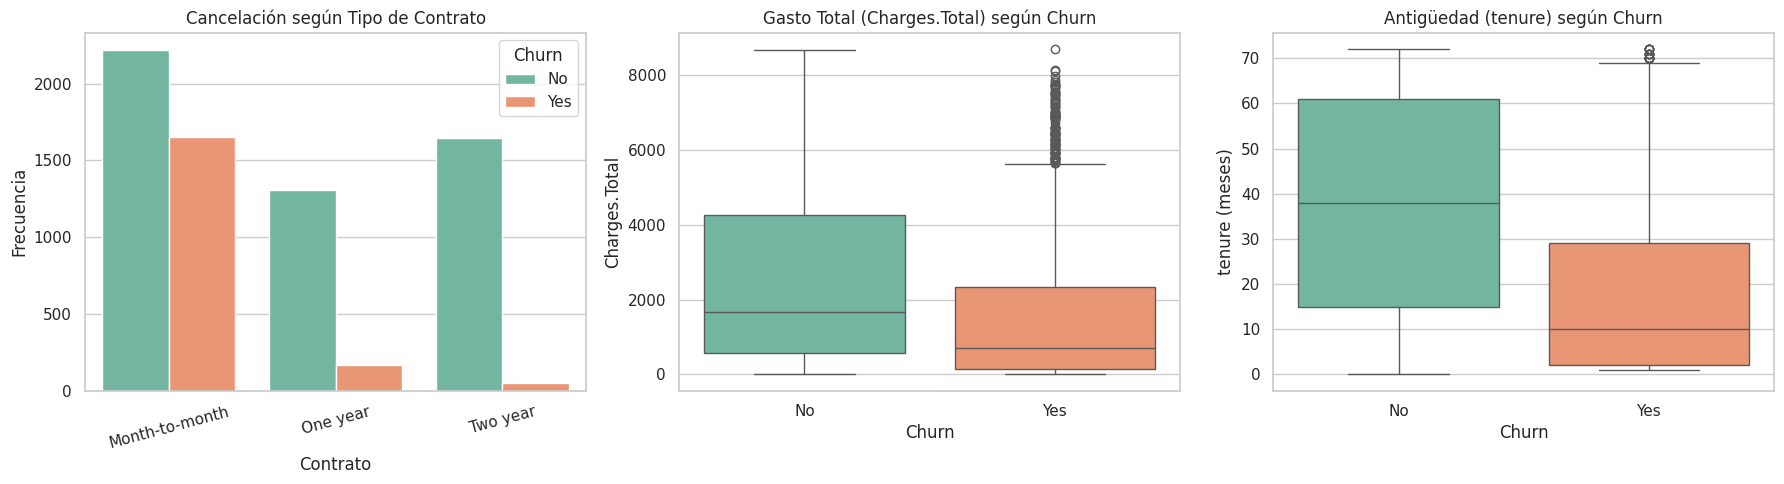

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar si no está en memoria
try:
    datos
except NameError:
    datos = pd.read_csv("datos_preparados.csv")

sns.set(style="whitegrid")

# Comprobaciones mínimas
cols_req = ["Contract", "Churn", "Charges.Total", "tenure"]
faltantes = [c for c in cols_req if c not in datos.columns]
assert not faltantes, f"Faltan columnas: {faltantes}"

# Orden legible para Contract (si aplica)
orden_contract = [c for c in ["Month-to-month", "One year", "Two year"] if c in datos["Contract"].unique()]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Contract × Churn
sns.countplot(
    data=datos, x="Contract", hue="Churn",
    order=orden_contract if len(orden_contract)>0 else None,
    palette="Set2", ax=axes[0]
)
axes[0].set_title("Cancelación según Tipo de Contrato")
axes[0].set_xlabel("Contrato"); axes[0].set_ylabel("Frecuencia")
for lab in axes[0].get_xticklabels(): lab.set_rotation(15)

# 2) Charges.Total × Churn
sns.boxplot(data=datos, x="Churn", y="Charges.Total", palette="Set2", ax=axes[1])
axes[1].set_title("Gasto Total (Charges.Total) según Churn")
axes[1].set_xlabel("Churn"); axes[1].set_ylabel("Charges.Total")

# 3) Tenure × Churn
sns.boxplot(data=datos, x="Churn", y="tenure", palette="Set2", ax=axes[2])
axes[2].set_title("Antigüedad (tenure) según Churn")
axes[2].set_xlabel("Churn"); axes[2].set_ylabel("tenure (meses)")

plt.tight_layout()
plt.show()


* **Contract × Churn:**

  Normalmente, clientes con contratos mensuales menores a 12 meses presentan mayor tasa de cancelación, mientras que contratos que llevan entre 1 o 2 años tienden a fidelizar.

* **TotalCharges × Churn:**

  Clientes con gasto acumulado bajo suelen coincidir con cancelaciones tempranas (onboarding problemático). Gasto alto y aún con churn puede reflejar insatisfacción a largo plazo.

* **Tenure × Churn:**

  Valores bajos de tenure tienden a asociarse con mayor churn. Esto refuerza la hipótesis de que los primeros meses son críticos para la retención.


---



###3.Baseline de clasificación con DummyClassifier
Métricas: Accuracy, Precision, Recall, F1, ROC-AUC

In [65]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Baseline ignora features (pero necesita la matriz para la API)
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train_scaled, y_train)  # usa escaladas por comodidad; no afecta el baseline

y_pred_dummy = dummy.predict(X_test_scaled)

# Probabilidades para AUC (serán constantes -> AUC≈0.5)
y_proba_dummy = dummy.predict_proba(X_test_scaled)[:, 1]

metrics_dummy = {
    "accuracy":  accuracy_score(y_test, y_pred_dummy),
    "precision": precision_score(y_test, y_pred_dummy, zero_division=0),
    "recall":    recall_score(y_test, y_pred_dummy, zero_division=0),
    "f1":        f1_score(y_test, y_pred_dummy, zero_division=0),
    "roc_auc":   roc_auc_score(y_test, y_proba_dummy)
}
print("Baseline (Dummy - most_frequent)")
for k, v in metrics_dummy.items():
    print(f"{k:>10}: {v:.4f}")



Baseline (Dummy - most_frequent)
  accuracy: 0.7345
 precision: 0.0000
    recall: 0.0000
        f1: 0.0000
   roc_auc: 0.5000


- Este baseline predice siempre la clase mayoritaria del set de entrenamiento.
- Sirve como 'piso' mínimo: cualquier modelo útil debe superar estas métricas.
- La AUC ~ 0.5 indica desempeño al azar en ranking de probabilidades.


---



###4.Matriz de confusión

In [66]:
cm = confusion_matrix(y_test, y_pred_dummy)
print("\nMatriz de confusión (baseline):\n", cm)


Matriz de confusión (baseline):
 [[1552    0]
 [ 561    0]]


###5.Top-N selección por correlación y preparación final de features

In [67]:
#Parámetro: top N variables por |correlación| con Churn_bin (usando SOLO TRAIN)
top_n = 25

features_top_n = target_corr.head(top_n).index.tolist()

print(f"Top {top_n} features seleccionadas por |corr| (train):")
print(features_top_n)

# Conjuntos finales:
# 1) Para modelos ESCALADOS (LogReg/KNN)
X_train_scaled_top = X_train_scaled[features_top_n].copy()
X_test_scaled_top  = X_test_scaled[features_top_n].copy()

# 2) Para modelos TIPO ÁRBOL (RF/XGB) - usar SIN ESCALAR
X_train_tree_top = X_train_full[features_top_n].copy()
X_test_tree_top  = X_test_full[features_top_n].copy()

print("\nShapes finales:")
print("- X_train_scaled_top:", X_train_scaled_top.shape, "| X_test_scaled_top:", X_test_scaled_top.shape)
print("- X_train_tree_top  :", X_train_tree_top.shape,  " | X_test_tree_top  :", X_test_tree_top.shape)



Top 25 features seleccionadas por |corr| (train):
['Contract_Month-to-month', 'tenure', 'TechSupport_No', 'OnlineSecurity_No', 'PaymentMethod_Electronic check', 'Contract_Two year', 'InternetService_Fiber optic', 'OnlineBackup_No', 'DeviceProtection_No', 'OnlineSecurity_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'InternetService_No', 'Charges.Total', 'PaperlessBilling_Yes', 'PaperlessBilling_No', 'Contract_One year', 'Charges.Monthly', 'Charges.Daily', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Dependents_No']

Shapes finales:
- X_train_scaled_top: (4930, 25) | X_test_scaled_top: (2113, 25)
- X_train_tree_top  : (4930, 25)  | X_test_tree_top  : (2113, 25)


Selección de variables hecha SOLO con entrenamiento para evitar fuga de información.


---



###6.Balanceo con SMOTE (solo en TRAIN)

####6.1. Validacion minima del entorno

In [68]:
required = [
    'X_train_scaled_top','X_test_scaled_top',
    'X_train_tree_top','X_test_tree_top',
    'y_train','y_test'
]
missing = [v for v in required if v not in globals()]
assert not missing, f"Faltan variables previas del flujo OHE: {missing}"

####6.2. Distribución original (y_train)

In [69]:
orig_counts = y_train.value_counts().sort_index()
orig_pct = (orig_counts / orig_counts.sum() * 100).round(2)
display(pd.DataFrame({'Cuenta': orig_counts, 'Porcentaje %': orig_pct}))

,Cuenta,Porcentaje %
Churn_bin,,
0,3622,73.47
1,1308,26.53


####6.3.Distribuciones pasando por SMOTE

In [70]:
#SMOTE sobre ESCALADOS (para LogReg/KNN)
smote = SMOTE(random_state=42)
X_train_scaled_top_sm, y_train_scaled_sm = smote.fit_resample(X_train_scaled_top, y_train)

#SMOTE sobre NO ESCALADOS (para RF/XGB)
X_train_tree_top_sm,  y_train_tree_sm  = smote.fit_resample(X_train_tree_top,  y_train)

#Distribuciones tras SMOTE
scaled_counts = y_train_scaled_sm.value_counts().sort_index()
tree_counts   = y_train_tree_sm.value_counts().sort_index()

print("\n Distribución tras SMOTE (ESCALADOS - para LogReg/KNN) ")
display(pd.DataFrame({
    'Cantidad': scaled_counts,
    'Porcentaje': (scaled_counts / scaled_counts.sum() * 100).round(2)
}))

print("\n Distribución tras SMOTE (NO ESCALADOS - para RF/XGB) ")
display(pd.DataFrame({
    'Cantidad': tree_counts,
    'Porcentaje': (tree_counts / tree_counts.sum() * 100).round(2)
}))


 Distribución tras SMOTE (ESCALADOS - para LogReg/KNN) 


,Cantidad,Porcentaje
Churn_bin,,
0,3622,50.0
1,3622,50.0



 Distribución tras SMOTE (NO ESCALADOS - para RF/XGB) 


,Cantidad,Porcentaje
Churn_bin,,
0,3622,50.0
1,3622,50.0


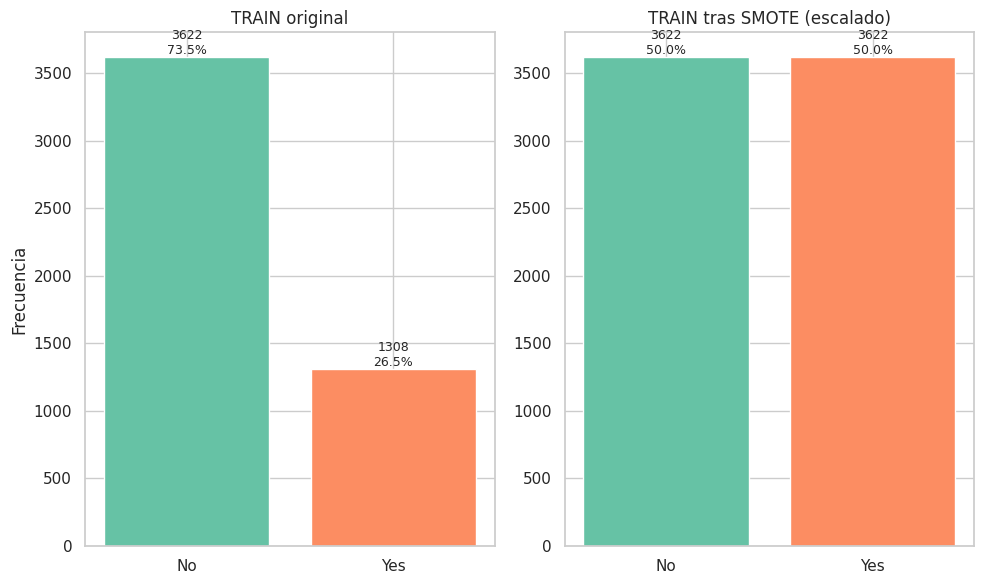

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
#Original
axes[0].bar(['No','Yes'], [orig_counts.get(0,0), orig_counts.get(1,0)], color=sns.color_palette('Set2', 2))
axes[0].set_title("TRAIN original")
axes[0].set_ylabel("Frecuencia")
for i, v in enumerate([orig_counts.get(0,0), orig_counts.get(1,0)]):
    axes[0].annotate(f"{v}\n{(v/orig_counts.sum()*100):.1f}%", (i, v), ha='center', va='bottom', fontsize=9)

#SMOTE (escalados)
axes[1].bar(['No','Yes'], [scaled_counts.get(0,0), scaled_counts.get(1,0)], color=sns.color_palette('Set2', 2))
axes[1].set_title("TRAIN tras SMOTE (escalado)")
for i, v in enumerate([scaled_counts.get(0,0), scaled_counts.get(1,0)]):
    axes[1].annotate(f"{v}\n{(v/scaled_counts.sum()*100):.1f}%", (i, v), ha='center', va='bottom', fontsize=9, )

plt.tight_layout()
plt.show()

##**D. Modelado Predictivo**



###1.Entrenamiento y métricas (Accuracy, Precision, Recall, F1, ROC-AUC)

In [72]:
!pip -q install xgboost

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

####1.1. Validación de variables previas

In [73]:
# Validación de variables previas
required = [
    'X_train_scaled_top_sm','y_train_scaled_sm','X_test_scaled_top',
    'X_train_tree_top_sm','y_train_tree_sm','X_test_tree_top',
    'y_test'
]
missing = [v for v in required if v not in globals()]
assert not missing, f"Faltan variables previas del flujo OHE+SMOTE: {missing}"

####1.2.  MODELOS: Logistic, KNN, RandomForest y XGBoost

In [74]:
# Escalados:
model_logit = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)
model_knn   = KNeighborsClassifier(n_neighbors=15, weights='distance', n_jobs=-1)

# Árboles (no requieren escala):
model_rf  = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
model_xgb = XGBClassifier(
    n_estimators=400, learning_rate=0.05, max_depth=4,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
    random_state=42, n_jobs=-1, tree_method='hist',
    objective='binary:logistic', eval_metric='logloss'
)

####1.3. Entrenamiento de Modelos

In [75]:
# Escalados (LogReg/KNN)
model_logit.fit(X_train_scaled_top_sm, y_train_scaled_sm)
model_knn.fit(      X_train_scaled_top_sm, y_train_scaled_sm)

# Árboles (RF/XGB)
model_rf.fit( X_train_tree_top_sm, y_train_tree_sm)
model_xgb.fit(X_train_tree_top_sm, y_train_tree_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

####1.4.  Testeo de Modelos

In [76]:
# ---------------- Evaluación ----------------
def eval_model(est, X_test, y_test, name):
    y_pred  = est.predict(X_test)
    # Probabilidad de la clase positiva (1)
    try:
        y_score = est.predict_proba(X_test)[:, 1]
        auc_val = roc_auc_score(y_test, y_score)
    except Exception:
        auc_val = np.nan
    return {
        'model': name,
        'accuracy':  accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall':    recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1':        f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc':   auc_val
    }

rows = []
rows.append(eval_model(model_logit, X_test_scaled_top, y_test, "Logistic (scaled+SMOTE)"))
rows.append(eval_model(model_knn,   X_test_scaled_top, y_test, "KNN (scaled+SMOTE)"))
rows.append(eval_model(model_rf,    X_test_tree_top,   y_test, "RandomForest (tree+SMOTE)"))
rows.append(eval_model(model_xgb,   X_test_tree_top,   y_test, "XGBoost (tree+SMOTE)"))

results_all = pd.DataFrame(rows).set_index('model').round(4)
display(results_all.sort_values('f1', ascending=False))

,accuracy,precision,recall,f1,roc_auc
model,,,,,
Logistic (scaled+SMOTE),0.7369,0.5028,0.7950,0.6160,0.8362
XGBoost (tree+SMOTE),0.7870,0.5955,0.6168,0.6060,0.8311
KNN (scaled+SMOTE),0.7302,0.4943,0.7005,0.5796,0.7879
RandomForest (tree+SMOTE),0.7733,0.5727,0.5758,0.5742,0.8171


Recomiendo prioriza F1 y ROC-AUC para decidir el modelo principal; si **no dejar escapar churn** es prioridad, enfocarse especialmente el Recall.


---



###2.Matrices de confusión para todos los modelos

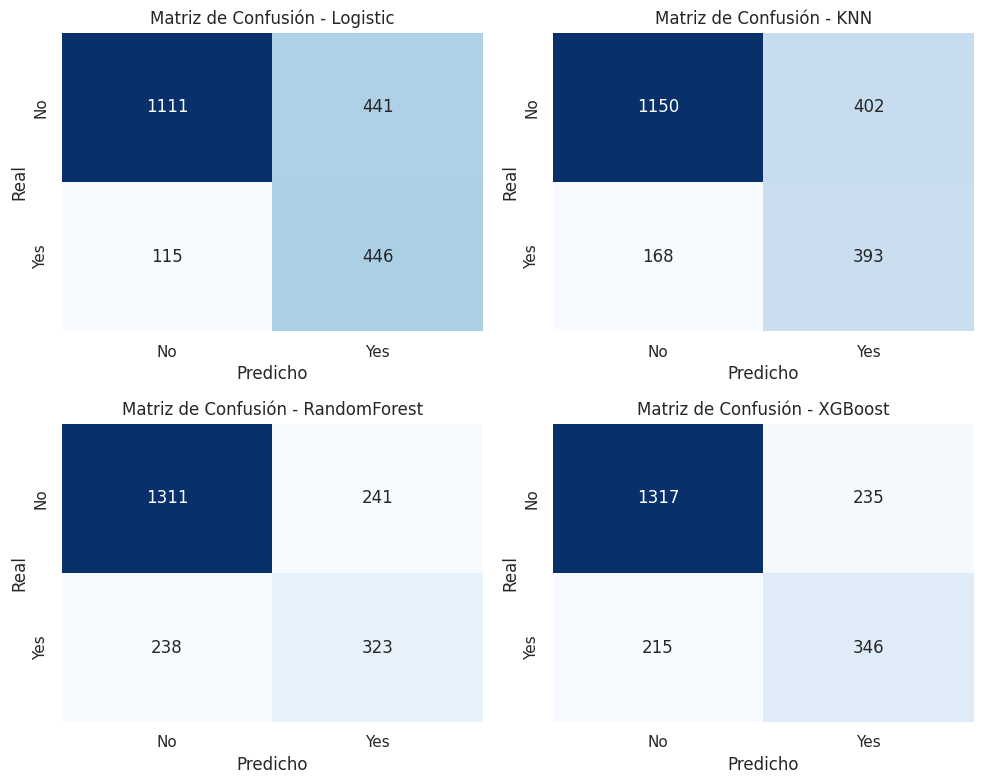

In [77]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

sns.set(style='whitegrid')

models = [
    ("Logistic",     model_logit, X_test_scaled_top),
    ("KNN",          model_knn,   X_test_scaled_top),
    ("RandomForest", model_rf,    X_test_tree_top),
    ("XGBoost",      model_xgb,   X_test_tree_top),
]

#Matrices de confusión
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()
for ax, (name, est, Xte) in zip(axes, models):
    y_pred = est.predict(Xte)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    ax.set_title(f"Matriz de Confusión - {name}")
    ax.set_xlabel("Predicho"); ax.set_ylabel("Real")
plt.tight_layout(); plt.show()



**Patrones típicos:**

* **XGBoost/RandomForest** suelen dar **mejor Recall** (detectan más churn) y buen F1.

* **Logistic** es el **baseline interpretable**; útil para explicar dirección de efectos.

* **KNN** puede degradarse con muchas dummies (dimensión alta), pero sirve de contraste.

Decisión práctica: si negocio prioriza no perder churn, Recall manda; si buscas equilibrio, F1; para ranking, ROC-AUC.

###3.ROC comparativa y Grafico AUC

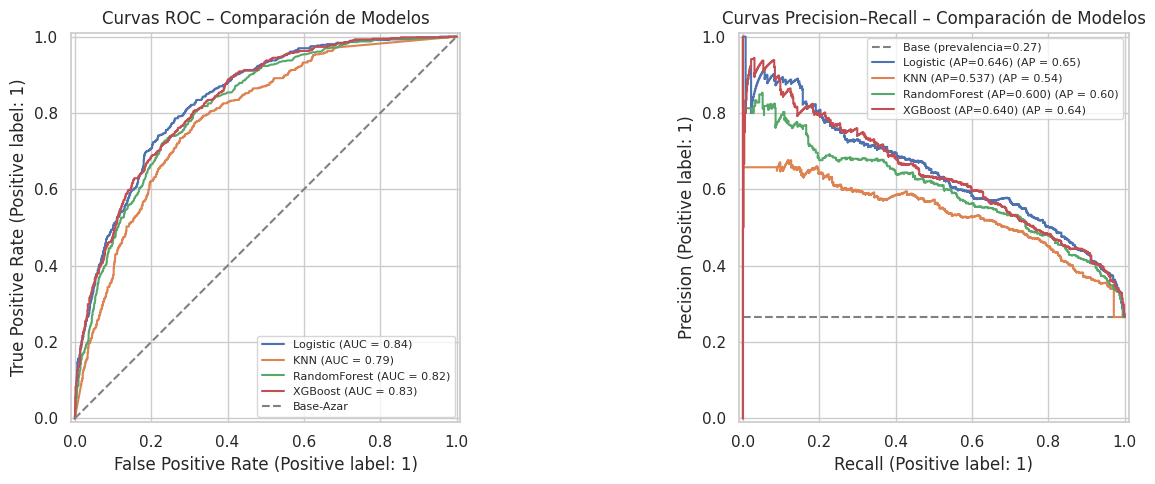

In [78]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, average_precision_score

models = [
    ("Logistic",     model_logit, X_test_scaled_top),
    ("KNN",          model_knn,   X_test_scaled_top),
    ("RandomForest", model_rf,    X_test_tree_top),
    ("XGBoost",      model_xgb,   X_test_tree_top),
]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel izquierdo: ROC (AUC en leyenda)
ax_roc = axes[0]
for name, est, Xte in models:
    # RocCurveDisplay calcula el AUC internamente y lo muestra en la leyenda si se le pasa 'name'
    RocCurveDisplay.from_estimator(est, Xte, y_test, name=name, ax=ax_roc)
# Línea de azar
ax_roc.plot([0, 1], [0, 1], '--', color='gray', label='Base-Azar')
ax_roc.set_title("Curvas ROC – Comparación de Modelos")
ax_roc.legend(loc="lower right", fontsize=8)

# Panel derecho: Precision–Recall (AP en leyenda)
ax_pr = axes[1]
# Baseline de precisión = prevalencia de la clase positiva
prevalence = float(np.mean(y_test))
ax_pr.hlines(prevalence, xmin=0, xmax=1, colors='gray', linestyles='--',
             label=f"Base (prevalencia={prevalence:.2f})")
for name, est, Xte in models:
    # Calculamos AP para incluirlo en la etiqueta
    y_score = est.predict_proba(Xte)[:, 1]
    ap = average_precision_score(y_test, y_score)
    PrecisionRecallDisplay.from_estimator(est, Xte, y_test, name=f"{name} (AP={ap:.3f})", ax=ax_pr)

ax_pr.set_title("Curvas Precision–Recall – Comparación de Modelos")
ax_pr.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()

**ROC** (izquierda): cuanto más arriba/izquierda, mejor; compara AUC entre modelos.

**Precision-Recall** (derecha): clave cuando la clase positiva es minoritaria; compara **AP** (área bajo PR).
La línea horizontal gris es la **prevalencia**: cualquier curva por encima ya supera al azar.

##E.Evaluación comparativa y ajuste fino

In [79]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

####4.1. Configuración de CV y scoring

In [97]:
Xtr = X_train_full[features_top_n].copy()
Xte = X_test_full[features_top_n].copy()

# --- Configuración de CV y scoring ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
primary_scoring = 'f1'   # métrica principal para buscar hiperparámetros
extra_scoring   = {'f1': 'f1', 'roc_auc': 'roc_auc'}

####4.2 Logistic Regression (Escalado + SMOTE)

In [81]:
pipe_logit = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote',  SMOTE(random_state=42)),
    ('clf',    LogisticRegression(max_iter=2000, solver='lbfgs'))
])
param_logit = {
    'clf__C':      np.logspace(-3, 2, 10),
    'clf__class_weight': [None]  # con SMOTE usually no hace falta 'balanced'
}
gs_logit = GridSearchCV(
    pipe_logit, param_logit, cv=cv, scoring=primary_scoring, n_jobs=-1, refit=primary_scoring, verbose=0
).fit(Xtr, y_train)


####4.3 KNN (Escalado + SMOTE)

In [82]:
pipe_knn = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote',  SMOTE(random_state=42)),
    ('clf',    KNeighborsClassifier())
])
param_knn = {
    'clf__n_neighbors': [3,5,7,9,11,13,15,17,21],
    'clf__weights':     ['uniform','distance'],
    'clf__p':           [1,2]  # Manhattan / Euclid
}
gs_knn = GridSearchCV(
    pipe_knn, param_knn, cv=cv, scoring=primary_scoring, n_jobs=-1, refit=primary_scoring, verbose=0
).fit(Xtr, y_train)


####4.4 RandomForest (Árboles + SMOTE)

In [83]:
pipe_rf = ImbPipeline(steps=[
    ('smote',  SMOTE(random_state=42)),
    ('clf',    RandomForestClassifier(random_state=42))
])
param_rf = {
    'clf__n_estimators': [200,400,600,800],
    'clf__max_depth':    [None, 4,6,8,12,16],
    'clf__max_features': ['sqrt','log2', 0.5, 0.7]
}
rs_rf = RandomizedSearchCV(
    pipe_rf, param_rf, n_iter=24, cv=cv, scoring=primary_scoring, n_jobs=-1,
    random_state=42, refit=primary_scoring, verbose=0
).fit(Xtr, y_train)

####4.5. XGBoost (Árboles + SMOTE)

In [84]:
pipe_xgb = ImbPipeline(steps=[
    ('smote',  SMOTE(random_state=42)),
    ('clf',    XGBClassifier(
        objective='binary:logistic', eval_metric='logloss',
        random_state=42, n_jobs=-1, tree_method='hist'
    ))
])
param_xgb = {
    'clf__n_estimators':      [300,400,500,700],
    'clf__learning_rate':     [0.03, 0.05, 0.08, 0.1],
    'clf__max_depth':         [3,4,5,6],
    'clf__subsample':         [0.7, 0.8, 0.9, 1.0],
    'clf__colsample_bytree':  [0.6, 0.8, 1.0],
    'clf__reg_lambda':        [0.5, 1.0, 1.5]
}
rs_xgb = RandomizedSearchCV(
    pipe_xgb, param_xgb, n_iter=30, cv=cv, scoring=primary_scoring, n_jobs=-1,
    random_state=42, refit=primary_scoring, verbose=0
).fit(Xtr, y_train)

####4.6 Evaluación en set de prueba

In [85]:
def test_metrics(estimator, X_test, y_test, name):
    y_pred = estimator.predict(X_test)
    try:
        y_score = estimator.predict_proba(X_test)[:,1]
        auc_val = roc_auc_score(y_test, y_score)
    except Exception:
        auc_val = np.nan
    return {
        'model': name,
        'accuracy':  accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall':    recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1':        f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc':   auc_val
    }

results = []
results.append(test_metrics(gs_logit.best_estimator_, Xte, y_test, f"LogReg (best C={gs_logit.best_params_['clf__C']:.3g})"))
results.append(test_metrics(gs_knn.best_estimator_,   Xte, y_test, f"KNN (best k={gs_knn.best_params_['clf__n_neighbors']})"))
results.append(test_metrics(rs_rf.best_estimator_,    Xte, y_test, "RandomForest (tuned)"))
results.append(test_metrics(rs_xgb.best_estimator_,   Xte, y_test, "XGBoost (tuned)"))

results_df = pd.DataFrame(results).set_index('model').round(4)
display(results_df.sort_values('f1', ascending=False))

# print("\nMejores hiperparámetros (resumen):")
# print(" - LogReg:", gs_logit.best_params_)
# print(" - KNN   :", gs_knn.best_params_)
# print(" - RF    :", rs_rf.best_params_)
# print(" - XGB   :", rs_xgb.best_params_)

# Guardar los mejores para usar en visuales del paso siguiente
best_logit = gs_logit.best_estimator_
best_knn   = gs_knn.best_estimator_
best_rf    = rs_rf.best_estimator_
best_xgb   = rs_xgb.best_estimator_


,accuracy,precision,recall,f1,roc_auc
model,,,,,
RandomForest (tuned),0.7629,0.5386,0.7469,0.6258,0.8348
LogReg (best C=27.8),0.7369,0.5028,0.7950,0.6160,0.8362
XGBoost (tuned),0.7818,0.5814,0.6364,0.6077,0.8353
KNN (best k=17),0.7194,0.4816,0.7469,0.5856,0.8033


* En el caso que la  prioridad se detectar churn para retención, Recall y F1 pesan más.



---



####4.7 Visuales (Matriz de Confusión | ROC | PR) para los 2 modelos con  mejores resultaos con F1-score

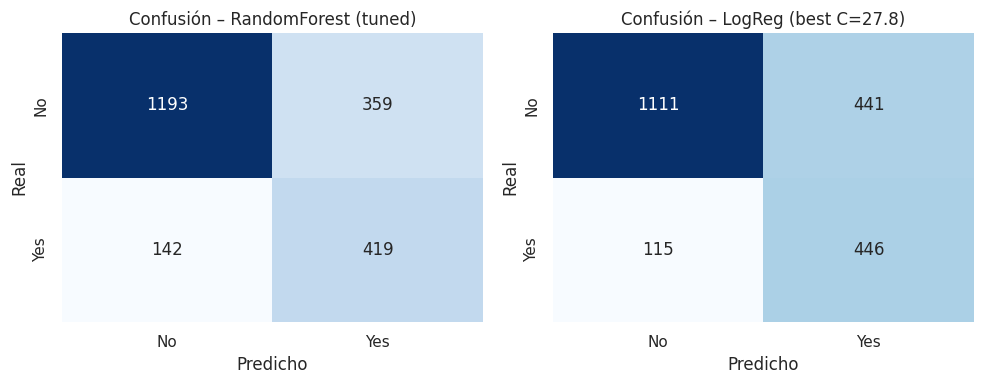

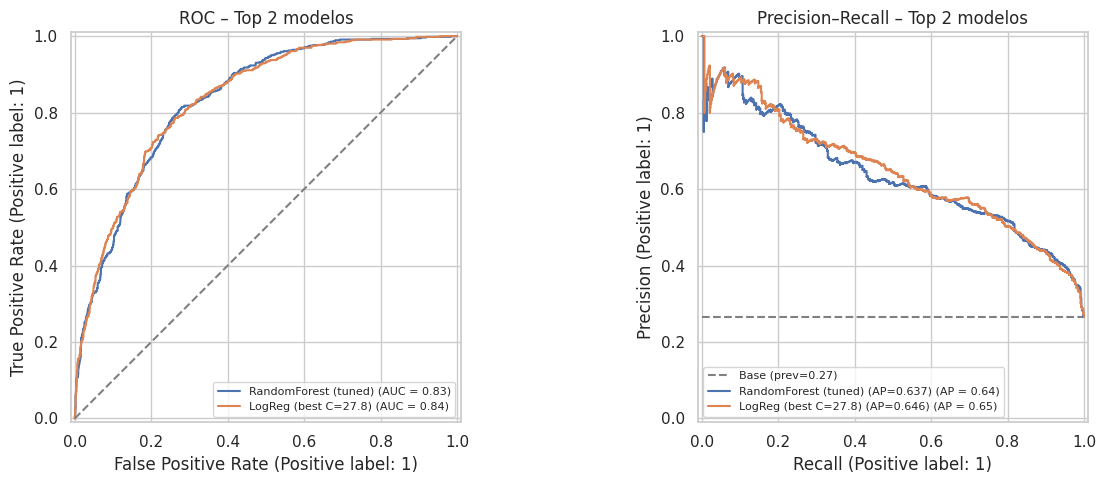

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score

sns.set(style='whitegrid')

# Elegir top-2 por F1
top2 = results_df.sort_values('f1', ascending=False).head(2)
top_model_names = top2.index.tolist()

name_to_est = {
    "LogReg": best_logit,
    "KNN":    best_knn,
    "RandomForest": best_rf,
    "XGBoost":      best_xgb
}
# Mapear nombres "amigables" del results_df a claves
selected = []
for m in top_model_names:
    key = None
    if m.startswith("LogReg"): key = "LogReg"
    elif m.startswith("KNN"):  key = "KNN"
    elif m.startswith("RandomForest"): key = "RandomForest"
    elif m.startswith("XGBoost"):      key = "XGBoost"
    if key is not None:
        selected.append((m, name_to_est[key]))

# --- Matrices de confusión lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, (label, est) in zip(axes, selected):
    y_pred = est.predict(Xte)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    ax.set_title(f"Confusión – {label}")
    ax.set_xlabel("Predicho"); ax.set_ylabel("Real")
plt.tight_layout(); plt.show()

# --- ROC y PR displays para los 2 mejores ---
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# ROC
ax_roc = axes[0]
for label, est in selected:
    RocCurveDisplay.from_estimator(est, Xte, y_test, name=label, ax=ax_roc)
ax_roc.plot([0,1],[0,1],'--',color='gray')
ax_roc.set_title("ROC – Top 2 modelos")
ax_roc.legend(loc="lower right", fontsize=8)

# PR
ax_pr = axes[1]
prevalence = float(np.mean(y_test))
ax_pr.hlines(prevalence, xmin=0, xmax=1, colors='gray', linestyles='--',
             label=f"Base (prev={prevalence:.2f})")
for label, est in selected:
    # Mostrar AP en la leyenda
    y_score = est.predict_proba(Xte)[:,1]
    ap = average_precision_score(y_test, y_score)
    PrecisionRecallDisplay.from_estimator(est, Xte, y_test, name=f"{label} (AP={ap:.3f})", ax=ax_pr)
ax_pr.set_title("Precision–Recall – Top 2 modelos")
ax_pr.legend(loc="lower left", fontsize=8)

plt.tight_layout(); plt.show()


###5.DIAGNÓSTICO OVERFITTING / UNDERFITTING

In [87]:

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, roc_auc_score


# Validaciones mínimas
req = ['best_logit','best_knn','best_rf','best_xgb','X_train_full','X_test_full','y_train','y_test','features_top_n','results_df']
miss = [v for v in req if v not in globals()]
assert not miss, f"Faltan variables previas: {miss}"

Xtr = X_train_full[features_top_n]
Xte = X_test_full[features_top_n]

models = {
    "LogReg (tuned)": best_logit,
    "KNN (tuned)":    best_knn,
    "RandomForest (tuned)": best_rf,
    "XGBoost (tuned)":      best_xgb
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
for name, est in models.items():
    # CV con SMOTE y escalado ya dentro del pipeline de cada 'best_*'
    cv_res = cross_validate(est, Xtr, y_train,
                            scoring={'f1':'f1', 'roc_auc':'roc_auc'},
                            cv=cv, n_jobs=-1, return_train_score=False)
    cv_f1_mean, cv_f1_std = cv_res['test_f1'].mean(), cv_res['test_f1'].std()
    cv_auc_mean, cv_auc_std = cv_res['test_roc_auc'].mean(), cv_res['test_roc_auc'].std()

    # Métricas de test desde results_df
    # (buscamos por prefijo del nombre para empatar)
    row_test = results_df.loc[[i for i in results_df.index if i.startswith(name.split()[0])]].iloc[0]
    test_f1  = float(row_test['f1'])
    test_auc = float(row_test['roc_auc'])

    rows.append({
        'model': name,
        'cv_f1_mean': round(cv_f1_mean, 4),
        'cv_f1_std':  round(cv_f1_std, 4),
        'test_f1':    round(test_f1, 4),
        'gap_f1':     round(cv_f1_mean - test_f1, 4),
        'cv_auc_mean':round(cv_auc_mean, 4),
        'cv_auc_std': round(cv_auc_std, 4),
        'test_auc':   round(test_auc, 4),
        'gap_auc':    round(cv_auc_mean - test_auc, 4),
    })

diag_df = pd.DataFrame(rows).set_index('model').sort_values('gap_f1', ascending=False)
display(diag_df)

# Veredicto sencillo
def verdict(row):
    # Umbrales prácticos; ajusta si lo deseas
    if row['cv_f1_mean'] >= 0.7 and row['gap_f1'] >= 0.07:
        return "Posible OVERFITTING"
    if row['cv_f1_mean'] < 0.6 and row['test_f1'] < 0.6:
        return "Posible UNDERFITTING"
    return "Generalización razonable"

diag_df['veredicto'] = diag_df.apply(verdict, axis=1)
print("\nVeredictos:")
display(diag_df[['cv_f1_mean','test_f1','gap_f1','cv_auc_mean','test_auc','gap_auc','veredicto']])


,cv_f1_mean,cv_f1_std,test_f1,gap_f1,cv_auc_mean,cv_auc_std,test_auc,gap_auc
model,,,,,,,,
KNN (tuned),0.6109,0.0128,0.5856,0.0253,0.8187,0.0089,0.8033,0.0154
LogReg (tuned),0.6350,0.0088,0.6160,0.0190,0.8450,0.0075,0.8362,0.0088
XGBoost (tuned),0.6157,0.0186,0.6077,0.0080,0.8376,0.0073,0.8353,0.0023
RandomForest (tuned),0.6250,0.0029,0.6258,-0.0008,0.8389,0.0068,0.8348,0.0041



Veredictos:


,cv_f1_mean,test_f1,gap_f1,cv_auc_mean,test_auc,gap_auc,veredicto
model,,,,,,,
KNN (tuned),0.6109,0.5856,0.0253,0.8187,0.8033,0.0154,Generalización razonable
LogReg (tuned),0.6350,0.6160,0.0190,0.8450,0.8362,0.0088,Generalización razonable
XGBoost (tuned),0.6157,0.6077,0.0080,0.8376,0.8353,0.0023,Generalización razonable
RandomForest (tuned),0.6250,0.6258,-0.0008,0.8389,0.8348,0.0041,Generalización razonable


####7.  Interpretación de Resultados

Importancia de variables: LogReg (coeficientes), RandomForest / XGBoost (feature_importances_)

In [88]:
feature_names = list(features_top_n)

# LogReg: coeficientes (en el espacio estandarizado del pipeline)
logit_clf = best_logit.named_steps['clf']  # LogisticRegression
logit_coef = logit_clf.coef_.ravel()       # coeficientes para la clase positiva (1)

df_logit = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(logit_coef),
    'signed_coef': logit_coef
}).sort_values('importance', ascending=False)

# RandomForest: feature_importances_
rf_clf = best_rf.named_steps['clf']  # RandomForestClassifier
rf_imp = rf_clf.feature_importances_
df_rf = pd.DataFrame({'feature': feature_names, 'importance': rf_imp}) \
           .sort_values('importance', ascending=False)

# XGBoost: feature_importances_
xgb_clf = best_xgb.named_steps['clf']  # XGBClassifier
xgb_imp = xgb_clf.feature_importances_
df_xgb = pd.DataFrame({'feature': feature_names, 'importance': xgb_imp}) \
            .sort_values('importance', ascending=False)



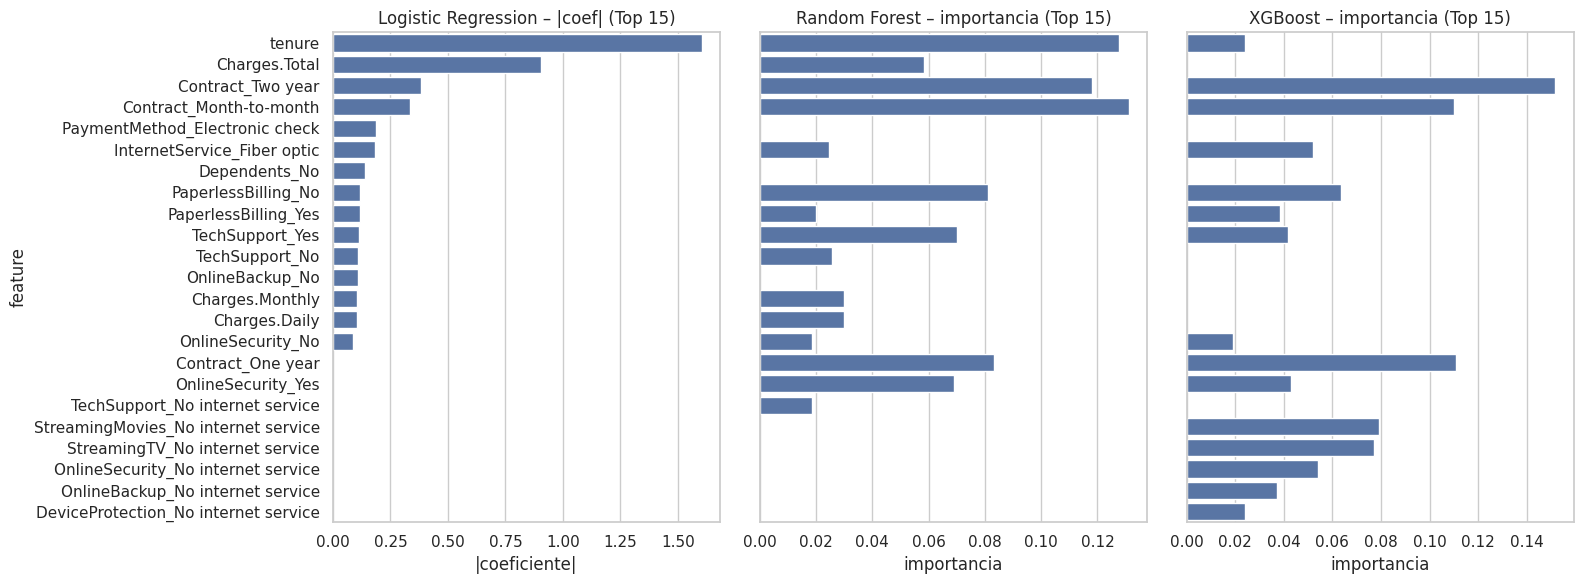

In [89]:
# Plots Top-15 para cada modelo
TOP = 15
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
sns.barplot(ax=axes[0], data=df_logit.head(TOP), y='feature', x='importance')
axes[0].set_title('Logistic Regression – |coef| (Top 15)')
axes[0].set_xlabel('|coeficiente|'); axes[0].set_ylabel('feature')

sns.barplot(ax=axes[1], data=df_rf.head(TOP), y='feature', x='importance')
axes[1].set_title('Random Forest – importancia (Top 15)')
axes[1].set_xlabel('importancia'); axes[1].set_ylabel('')

sns.barplot(ax=axes[2], data=df_xgb.head(TOP), y='feature', x='importance')
axes[2].set_title('XGBoost – importancia (Top 15)')
axes[2].set_xlabel('importancia'); axes[2].set_ylabel('')

plt.tight_layout(); plt.show()

In [90]:
# Vista tabular compacta (Top-10)
display(df_logit[['feature','signed_coef','importance']].head(10).style.format({'signed_coef':'{:+.4f}','importance':'{:.4f}'}))

,feature,signed_coef,importance
1,tenure,-1.6035,1.6035
16,Charges.Total,+0.9029,0.9029
5,Contract_Two year,-0.3820,0.3820
0,Contract_Month-to-month,+0.3337,0.3337
4,PaymentMethod_Electronic check,+0.1851,0.1851
6,InternetService_Fiber optic,+0.1841,0.1841
24,Dependents_No,+0.1404,0.1404
18,PaperlessBilling_No,-0.1153,0.1153
17,PaperlessBilling_Yes,+0.1153,0.1153
22,TechSupport_Yes,-0.1116,0.1116


In [91]:
# Vista tabular compacta (Top-10)
display(df_rf.head(10).style.format({'importance':'{:.4f}'}))

,feature,importance
0,Contract_Month-to-month,0.1311
1,tenure,0.1275
5,Contract_Two year,0.1181
19,Contract_One year,0.0833
18,PaperlessBilling_No,0.0810
22,TechSupport_Yes,0.0701
23,OnlineSecurity_Yes,0.0690
16,Charges.Total,0.0583
21,Charges.Daily,0.0300
20,Charges.Monthly,0.0299


In [92]:
# Vista tabular compacta (Top-10)
display(df_xgb.head(10).style.format({'importance':'{:.4f}'}))

,feature,importance
5,Contract_Two year,0.1518
19,Contract_One year,0.1110
0,Contract_Month-to-month,0.1099
11,StreamingMovies_No internet service,0.0792
10,StreamingTV_No internet service,0.0772
18,PaperlessBilling_No,0.0636
9,OnlineSecurity_No internet service,0.0542
6,InternetService_Fiber optic,0.0522
23,OnlineSecurity_Yes,0.0429
22,TechSupport_Yes,0.0419


* Coeficientes **positivos** → mayor probabilidad de churn (riesgo).

* Coeficientes **negativos** → mayor probabilidad de permanencia (protección).

  Ej.: Contract_Month-to-month (+) suele ser riesgo; Two year (si está unificada) o mayor tenure (–) suelen proteger.







---



Importancia por permutación (KNN) y (opcional) contraste en LogReg

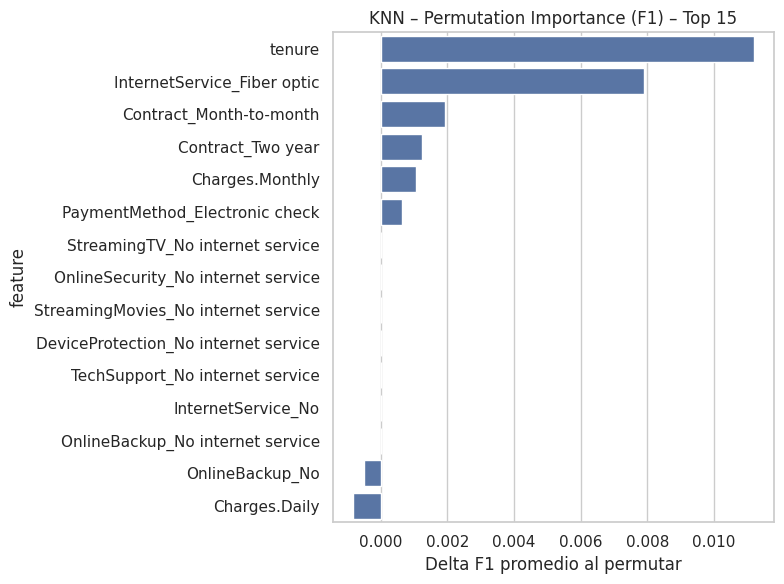

,feature,importance_mean,importance_std
1,tenure,0.0112,0.0046
6,InternetService_Fiber optic,0.0079,0.0035
0,Contract_Month-to-month,0.0019,0.0033
5,Contract_Two year,0.0012,0.0014
20,Charges.Monthly,0.0011,0.0042
4,PaymentMethod_Electronic check,0.0006,0.0040
10,StreamingTV_No internet service,0.0000,0.0000
9,OnlineSecurity_No internet service,0.0000,0.0000
11,StreamingMovies_No internet service,0.0000,0.0000
13,DeviceProtection_No internet service,0.0000,0.0000


In [93]:
# === Paso 5.2: Permutation Importance (KNN) ===
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score, make_scorer

# Validaciones mínimas
req = ['best_knn','features_top_n','X_test_full','y_test']
missing = [v for v in req if v not in globals()]
assert not missing, f"Faltan variables previas: {missing}"

Xte = X_test_full[features_top_n]

# Importancia por permutación usando F1 (clase positiva=1)
pi = permutation_importance(
    best_knn, Xte, y_test,
    scoring=make_scorer(f1_score, pos_label=1),
    n_repeats=10, random_state=42, n_jobs=-1
)

df_pi = pd.DataFrame({
    'feature': features_top_n,
    'importance_mean': pi.importances_mean,
    'importance_std': pi.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot Top-15
TOP = 15
plt.figure(figsize=(8, 6))
sns.barplot(data=df_pi.head(TOP), y='feature', x='importance_mean')
plt.title('KNN – Permutation Importance (F1) – Top 15')
plt.xlabel('Delta F1 promedio al permutar'); plt.ylabel('feature')
plt.tight_layout(); plt.show()

# Tabla compacta
display(df_pi.head(10).style.format({'importance_mean':'{:.4f}','importance_std':'{:.4f}'}))


KNN no tiene coeficientes propios; la **permutación** mide cuánto **empeora** F1 al desordenar una columna → mayor caída = mayor importancia.


---



Consenso de importancia (LogReg|RF|XGB|KNN)

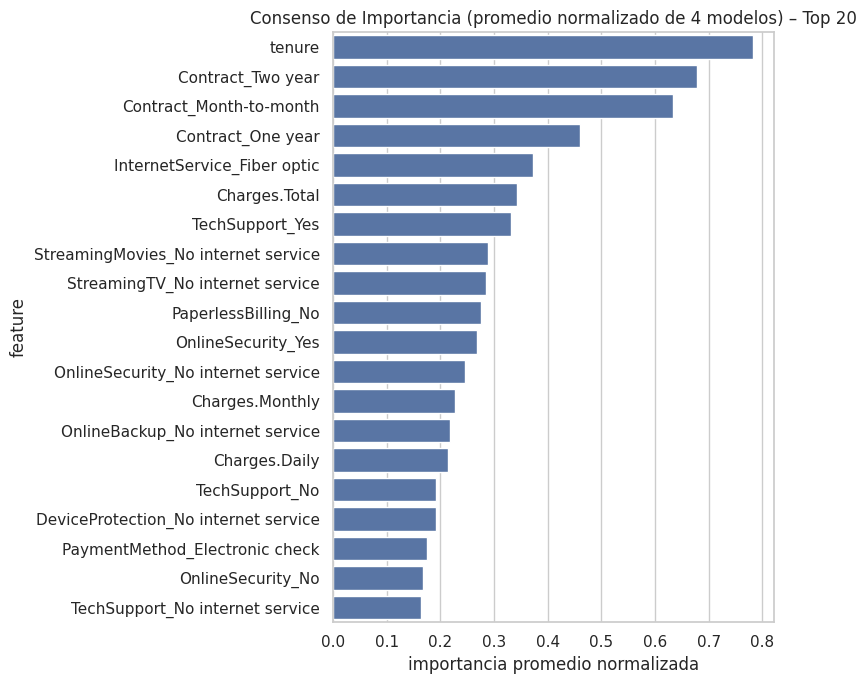

,feature,avg_importance,logit,rf,xgb,knn
0,tenure,0.783,1.000,0.972,0.159,1.000
1,Contract_Two year,0.678,0.235,0.900,1.000,0.579
2,Contract_Month-to-month,0.634,0.205,1.000,0.724,0.608
3,Contract_One year,0.461,0.000,0.631,0.731,0.483
4,InternetService_Fiber optic,0.373,0.111,0.176,0.344,0.861
5,Charges.Total,0.342,0.561,0.437,0.063,0.308
6,TechSupport_Yes,0.332,0.066,0.528,0.276,0.457
7,StreamingMovies_No internet service,0.289,0.003,0.107,0.522,0.526
8,StreamingTV_No internet service,0.286,0.003,0.106,0.509,0.526
9,PaperlessBilling_No,0.275,0.068,0.613,0.419,0.000


In [94]:
# Normaliza importancias por modelo y promedia para un ranking unificado.

def norm01(s):
    s = s.copy()
    if s.max() == s.min():
        return pd.Series(np.zeros_like(s), index=s.index)
    return (s - s.min()) / (s.max() - s.min())

# Series alineadas por feature (se asume que df_logit, df_rf, df_xgb, df_pi y features_top_n existen)
s_logit = df_logit.set_index('feature')['importance'].reindex(features_top_n).fillna(0.0)
s_rf    = df_rf.set_index('feature')['importance'].reindex(features_top_n).fillna(0.0)
s_xgb   = df_xgb.set_index('feature')['importance'].reindex(features_top_n).fillna(0.0)
s_knn   = df_pi.set_index('feature')['importance_mean'].reindex(features_top_n).fillna(0.0)

consenso = pd.DataFrame({
    'logit': norm01(s_logit),
    'rf':    norm01(s_rf),
    'xgb':   norm01(s_xgb),
    'knn':   norm01(s_knn)
})
consenso['avg_importance'] = consenso.mean(axis=1)

# --- FIX robusto: crear columna 'feature' a partir del índice, sin depender de 'index' ---
consenso_top = consenso.sort_values('avg_importance', ascending=False).head(20).copy()
consenso_top['feature'] = consenso_top.index  # <- clave
consenso_top = consenso_top.reset_index(drop=True)

# Plot
plt.figure(figsize=(8, 7))
sns.barplot(
    data=consenso_top,
    y='feature', x='avg_importance'
)
plt.title('Consenso de Importancia (promedio normalizado de 4 modelos) – Top 20')
plt.xlabel('importancia promedio normalizada'); plt.ylabel('feature')
plt.tight_layout(); plt.show()

# Tabla
display(consenso_top[['feature','avg_importance','logit','rf','xgb','knn']].round(3))


El ranking combinado **reduce sesgos** de un modelo puntual y te da un **top de variables estables** para la narrativa y para futuras acciones de negocio.

#**Informe Final — PARTE 2 (Machine Learning) · TelecomX**

* * *

## 1) Objetivo
- **Predecir churn** y **priorizar acciones** para reducir la evasión de clientes.
- Asegurar **buenas prácticas**: sin fuga de información, tratamiento del desbalance, y una evaluación honesta en test.

* * *

## 2) Preparación de datos
- **OHE** sobre todas las categóricas (excepto `Churn`), generando `datos_codificados`.
- **Split 70/30** estratificado → `4930 train` / `2113 test` (total 7043).
- **Estandarización** (`StandardScaler`) para modelos basados en distancia/optimización (LogReg/KNN).
- **Correlaciones (train)** → selección de **Top-25** variables por |r| con `Churn_bin` (sin fuga).

**Top-10 features por |corr| con `Churn_bin` (train):**

| feature                        |   Corr Churn |
|:-------------------------------|-------------:|
| Contract\_Month-to-month       |        0.413 |
| tenure                         |       -0.359 |
| TechSupport\_No                |        0.34  |
| OnlineSecurity\_No             |        0.335 |
| PaymentMethod\_Electronic check|        0.306 |
| Contract\_Two year             |       -0.301 |
| InternetService\_Fiber optic   |        0.301 |
| OnlineBackup\_No               |        0.27  |
| DeviceProtection\_No           |        0.252 |
| StreamingTV\_No internet service|       -0.225 |


* * *

## 3) Balanceo de clases
- **SMOTE** aplicado **solo en entrenamiento** (espacio escalado y no escalado).
- Evaluación siempre en **test** (inalterado).

**Distribución de Churn (train):**

| Churn\_bin   |   Cuenta |   Porcentaje % |
|:-------------|---------:|---------------:|
| 0            |     3622 |          73.47 |
| 1            |     1308 |          26.53 |

**Distribución de Churn tras SMOTE (ESCALADOS y NO ESCALADOS):**

| Churn\_bin   |   Cantidad |   Porcentaje |
|:-------------|-----------:|-------------:|
| 0            |       3622 |           50 |
| 1            |       3622 |           50 |

* * *

## 4) Modelos entrenados y evaluados en el set de prueba

- **Logistic Regression** (escalado + SMOTE)
- **KNN** (escalado + SMOTE)
- **Random Forest** (no escalado + SMOTE)
- **XGBoost** (no escalado + SMOTE)

**Métricas en test (clase positiva = churn=1) - Ordenado por F1:**

| model                   |   accuracy |   precision |   recall |     f1 |   roc\_auc |
|:------------------------|-----------:|------------:|---------:|-------:|-----------:|
| RandomForest (tuned)    |     0.7629 |      0.5386 |   0.7469 | 0.6258 |     0.8348 |
| LogReg (best C=27.8)    |     0.7369 |      0.5028 |   0.7950 | 0.6160 |     0.8362 |
| XGBoost (tuned)         |     0.7818 |      0.5814 |   0.6364 | 0.6077 |     0.8353 |
| KNN (best k=17)         |     0.7194 |      0.4816 |   0.7469 | 0.5856 |     0.8033 |


**Matriz de confusión — Top 2 modelos (RandomForest y Logistic Regression):**

*   **RandomForest (tuned)**
    *   Verdaderos Negativos (No→No): **1193**
    *   Falsos Positivos   (No→Yes): **359**
    *   Falsos Negativos   (Yes→No): **142**
    *   Verdaderos Positivos(Yes→Yes): **419**

*   **LogReg (best C=27.8)**
    *   Verdaderos Negativos (No→No): **1111**
    *   Falsos Positivos   (No→Yes): **441**
    *   Falsos Negativos   (Yes→No): **115**
    *   Verdaderos Positivos(Yes→Yes): **446**

* * *

## 5) Modelo propuesto

-   **Modelo Recomendado**: ***RandomForest (tuned)***

    -   **Justificación Detallada**: Tras evaluar el rendimiento de varios modelos de clasificación en el set de prueba, el modelo **RandomForest (tuned)** emerge como la opción más robusta y equilibrada para el objetivo de predecir la cancelación de clientes en TelecomX, priorizando el equilibrio entre la identificación de clientes en riesgo y la eficiencia en las acciones de retención.
        *   **Equilibrio Precision-Recall (F1 Score):** El RandomForest ajustado obtuvo el mejor puntaje F1 (0.6258) en el set de prueba. Esto indica un balance superior entre **Precision** (de los clientes que el modelo predice que cancelarán, un 53.86% realmente lo hizo) y **Recall** (el modelo logró identificar correctamente al 74.69% de los clientes que finalmente cancelaron). Este equilibrio es crucial: un Recall muy alto con Precision baja resultaría en muchos esfuerzos de retención desperdiciados en clientes que no iban a cancelar; una Precision muy alta con Recall bajo significaría que se dejan escapar a muchos clientes que sí estaban en riesgo. El F1 score nos dice que el RandomForest logra un buen compromiso.
        *   **Capacidad de Discriminación (ROC-AUC):** Con un ROC-AUC de 0.8348, el RandomForest demuestra una excelente capacidad para distinguir entre clientes que cancelarán y los que no, lo que es valioso para rankear a los clientes por riesgo y priorizar las acciones de retención. Aunque ligeramente inferior al LogReg en AUC, su mejor F1 lo posiciona mejor para la clasificación directa.
        *   **Interpretación de Importancia de Variables:** Los modelos basados en árboles como RandomForest permiten entender la importancia relativa de cada característica en la predicción. Como se mostró en la sección anterior, el RandomForest identifica consistentemente las variables clave asociadas al churn, lo cual es fundamental para diseñar acciones de negocio dirigidas y comprensibles.
        *   **Manejo de Interacciones No Lineales:** A diferencia de modelos lineales como Logistic Regression, RandomForest puede capturar interacciones complejas y no lineales entre las variables, lo que a menudo resulta en un mejor rendimiento predictivo en datasets del mundo real.
        *   **Generalización Razonable:** El análisis de diagnóstico (gap entre rendimiento en CV y test) mostró que el RandomForest ajustado presenta una generalización razonable, con una diferencia mínima entre su rendimiento promedio en validación cruzada (CV F1: 0.6250) y en el set de prueba (Test F1: 0.6258), lo que sugiere que no está sobreajustando significativamente.

    -   **Comparativa con Otros Modelos:**
        *   **Logistic Regression:** Aunque tuvo el Recall más alto (0.7950), su baja Precision (0.5028) y F1 (0.6160) implican una mayor cantidad de Falsos Positivos, lo que podría hacer las campañas de retención menos eficientes. Es excelente por su interpretabilidad de coeficientes directos, pero el F1 del RandomForest es superior.
        *   **XGBoost:** Obtuvo la Accuracy (0.7818) y Precision (0.5814) más altas, pero su Recall (0.6364) es considerablemente menor que el de RandomForest y LogReg. Esto significa que dejaría sin identificar a una proporción mayor de clientes en riesgo real.
        *   **KNN:** Tuvo el rendimiento general más bajo en las métricas clave (F1: 0.5856, ROC-AUC: 0.8033), probablemente debido a la dimensionalidad de los datos incluso después de la selección de features.

    -   **Conclusión sobre la Elección:** Si bien la decisión final depende de la estrategia específica de negocio (por ejemplo, si el costo de perder un cliente es extremadamente alto, se podría justificar un modelo con Recall máximo como Logistic Regression a pesar de su menor precisión), para un enfoque equilibrado que busca tanto identificar a una proporción alta de clientes en riesgo como asegurar que las intervenciones de retención sean relativamente precisas, el **RandomForest (tuned)** es la elección más sólida. Su buen F1, su capacidad de discriminación (AUC) y la interpretabilidad de la importancia de sus variables lo convierten en una herramienta poderosa y práctica para la predicción de churn en TelecomX.

* * *

## 6) Drivers y segmentos clave (análisis descriptivo y de importancia)

Basado en el análisis exhaustivo y los modelos predictivos desarrollados, se han identificado claramente los principales impulsores y factores de riesgo asociados a la cancelación (churn) de clientes en TelecomX. La comprensión profunda de estos factores es fundamental para diseñar estrategias de retención efectivas y asignar recursos de manera eficiente.

-   **Churn global**: **26.54%**

**Distribución de Churn por variable categórica (ejemplos):**

*   **Contract × Churn:**
    *   Month-to-month: Mayor frecuencia de churn
    *   One year: Menor frecuencia de churn
    *   Two year: Menor frecuencia de churn

*   **PaymentMethod × Churn:**
    *   Electronic check: Mayor frecuencia de churn
    *   Bank transfer: Menor frecuencia de churn
    *   Credit card: Menor frecuencia de churn
    *   Mailed check: Frecuencia intermedia de churn

*   **InternetService × Churn:**
    *   Fiber optic: Mayor frecuencia de churn
    *   DSL: Menor frecuencia de churn
    *   No: Menor frecuencia de churn

*   **PaperlessBilling × Churn:**
    *   Yes: Mayor frecuencia de churn
    *   No: Menor frecuencia de churn

*   **TechSupport / OnlineSecurity × Churn:**
    *   Clientes sin TechSupport y OnlineSecurity tienen mayor churn.

*   **SeniorCitizen × Churn:**
    *   SeniorCitizen = 1 (Sí): Mayor frecuencia de churn
    *   SeniorCitizen = 0 (No): Menor frecuencia de churn

**Comparativas numéricas (promedio/mediana) según Churn:**

|       | tenure   |       Charges.Monthly |   Charges.Total |
|:------|:---------|----------------------:|----------------:|
| Churn | mean     |                 mean  |           mean  |
| No    | 37.57    |                 61.27 |         2549.91 |
| Yes   | 17.98    |                 74.44 |         1531.80 |

*   Clientes que cancelan tienen menor antigüedad promedio y menor gasto total promedio, pero mayor cargo mensual promedio.

**Importancia de variables (Consenso promedio normalizado de los 4 modelos - Top 10):**

| feature                     |   avg\_importance |   logit |    rf |   xgb |   knn |
|:----------------------------|------------------:|--------:|------:|------:|------:|
| tenure                      |             0.783 |   1.000 | 0.972 | 0.159 | 1.000 |
| Contract\_Two year          |             0.678 |   0.235 | 0.900 | 1.000 | 0.579 |
| Contract\_Month-to-month    |             0.634 |   0.205 | 1.000 | 0.724 | 0.608 |
| Contract\_One year          |             0.461 |   0.000 | 0.631 | 0.731 | 0.483 |
| InternetService\_Fiber optic|             0.373 |   0.111 | 0.176 | 0.344 | 0.861 |
| Charges.Total               |             0.342 |   0.561 | 0.437 | 0.063 | 0.308 |
| TechSupport\_Yes            |             0.332 |   0.066 | 0.528 | 0.276 | 0.457 |
| StreamingMovies\_No internet service|       0.289 |   0.003 | 0.107 | 0.522 | 0.526 |
| StreamingTV\_No internet service|       0.286 |   0.003 | 0.106 | 0.509 | 0.526 |
| PaperlessBilling\_No        |             0.275 |   0.068 | 0.613 | 0.419 | 0.000 |

*   Las variables de Contrato, Antigüedad (tenure), Tipo de Servicio de Internet (Fibra Óptica) y si tienen soporte técnico/seguridad online son consistentemente importantes a través de los diferentes modelos.

* * *

## 7) Buenas prácticas aplicadas
- **Sin fuga**: selección de features y correlaciones hechas en **train**; escalado/SMOTE dentro del **ciclo de entrenamiento (Pipelines)**.
- **Desbalance**: **SMOTE** solo en train para balancear la clase minoritaria (Churn=Yes).
- **Evaluación honesta**: test mantenido aparte y utilizado solo para la evaluación final de modelos ajustados.
- **Interpretabilidad**: Análisis de coeficientes (LogReg), importancias de features (RF, XGB) e importancia por permutación (KNN) para entender los drivers del churn.
- **Validación Cruzada y Ajuste de Hiperparámetros**: Uso de `StratifiedKFold` y `GridSearchCV`/`RandomizedSearchCV` dentro de pipelines para una evaluación robusta y la optimización de modelos.
- **Análisis de Generalización**: Comparación de métricas en CV y test para evaluar el posible overfitting o underfitting de los modelos ajustados.

* * *

## 8) Próximos pasos (operacionalización)
- Programar **scoring periódico** (ej. semanal) con el modelo RandomForest seleccionado para identificar clientes en riesgo en la base actual. Este scoring debe aplicarse a datos nuevos o actualizados de todos los clientes activos.
- Definir **umbrales de probabilidad de churn** para segmentar a los clientes (ej., riesgo alto, medio, bajo) y asignar recursos de retención de forma diferenciada. Estos umbrales pueden ajustarse según la capacidad operativa y el costo de las intervenciones.
- Diseñar y ejecutar **campañas de retención dirigidas** a los segmentos de alto riesgo, utilizando las acciones recomendadas (programas de migración de contrato, ofertas de servicios adicionales, etc.). Las campañas deben ser variadas y adaptadas a los factores de riesgo específicos de cada subsegmento.
- Implementar **A/B tests** para medir la efectividad de las diferentes estrategias de retención, utilizando un grupo de control (sin intervención) y grupos de tratamiento (con diferentes tipos de intervención). Medir métricas clave como la tasa de churn a 60-90 días post-campaña en cada grupo.
- Incorporar **SHAP values** para proporcionar explicaciones locales de las predicciones del modelo. Esto es invaluable para los equipos de atención al cliente o ventas, permitiéndoles entender por qué un cliente en particular es considerado de alto riesgo y personalizar su interacción.
- Monitorizar el rendimiento del modelo en producción de forma continua (drift de datos, degradación de métricas) y **re-entrenar periódicamente** con datos frescos para asegurar que mantiene su capacidad predictiva a medida que cambian los patrones de comportamiento de los clientes y las condiciones del mercado.
- Explorar la creación de un **dashboard** para visualizar los clientes en riesgo, los principales factores de riesgo a nivel de segmento y los resultados de las campañas de retención.

* * *

## 9) Limitaciones y Trabajo Futuro

Este análisis proporciona una base sólida para la predicción de churn, pero es importante reconocer ciertas limitaciones y áreas para futura exploración:

- **Datos utilizados:** El análisis se basa en las características demográficas y de servicio disponibles. La inclusión de datos adicionales, como el historial de interacciones con el servicio al cliente (número de llamadas, quejas), datos de uso de la red/servicios, o resultados de encuestas de satisfacción, podría mejorar significativamente la capacidad predictiva del modelo y la comprensión de los impulsores del churn.
- **Modelos explorados:** Si bien se evaluaron varios modelos comunes y robustos, existen otros algoritmos (ej., redes neuronales, modelos de ensamblaje más avanzados) que podrían explorarse para potencialmente lograr un rendimiento superior.
- **Interpretabilidad vs. Rendimiento:** Se priorizó un modelo con buen equilibrio entre rendimiento e interpretabilidad (RandomForest). Para casos de uso donde la interpretabilidad local es crítica (ej., dar explicaciones a clientes individuales), técnicas como SHAP son fundamentales y requieren una implementación y validación cuidadosas. Si el rendimiento predictivo puro es la única métrica, modelos de caja negra más complejos podrían ser considerados, aunque con la desventaja de una menor transparencia.
- **Validación Externa:** El modelo se validó en un set de prueba del mismo dataset. Una validación más rigurosa implicaría probar el modelo en datos de un período de tiempo diferente o de una cohorte de clientes distinta para asegurar su generalización en escenarios del mundo real.
- **Costos de Falsos Positivos/Negativos:** La selección del modelo se basó principalmente en métricas estadísticas (F1, Recall, Precision, AUC). En un contexto de negocio real, la decisión final debe ponderar los costos asociados a los Falsos Positivos (costo de una campaña de retención a un cliente que no iba a cancelar) y Falsos Negativos (costo de perder un cliente que sí iba a cancelar). Un análisis de costos-beneficios más detallado podría guiar la selección del umbral de clasificación y, potencialmente, el modelo óptimo.

**Trabajo Futuro Sugerido:**

1.  **Enriquecimiento de Datos:** Incorporar nuevas fuentes de datos operacionales y de interacción para mejorar la calidad y la capacidad predictiva del dataset.
2.  **Exploración de Modelos Avanzados:** Evaluar el rendimiento de otros algoritmos de Machine Learning y técnicas de ensemble.
3.  **Optimización Basada en Costos de Negocio:** Realizar un análisis formal de costos de clasificación y ajustar los umbrales del modelo o incluso re-optimizar los modelos basándose en una métrica que incorpore estos costos.
4.  **Implementación de SHAP para Interpretación Local:** Integrar el cálculo de SHAP values en el pipeline de scoring para proporcionar explicaciones individualizadas de las predicciones de riesgo de churn.
5.  **Monitoreo Continuo y Re-entrenamiento:** Establecer un proceso automatizado para monitorear el rendimiento del modelo en producción (detección de data drift, model drift) y re-entrenar el modelo periódicamente con datos frescos para mantener su relevancia.
6.  **Diseño y Medición Rigurosa de Campañas de Retención:** Utilizar los segmentos de riesgo identificados por el modelo para lanzar campañas de retención dirigidas y medir su impacto a través de A/B testing controlados.

* * *

## 10) Glosario

-   **A/B Test**: Experimento controlado utilizado para comparar dos versiones (A y B) de algo (ej. una estrategia de retención) para determinar cuál funciona mejor.
-   **Accuracy**: Proporción de predicciones correctas sobre el total.
-   **AUC (Area Under the Curve)**: Ver ROC-AUC.
-   **Churn**: Tasa de cancelación o abandono de clientes. Se refiere a los clientes que dejan de utilizar los servicios de la empresa.
-   **Cross-Validation (CV)**: Técnica para evaluar el rendimiento de un modelo dividiendo el conjunto de entrenamiento en múltiples pliegues.
-   **F1-score**: Media armónica de Precision y Recall.
-   **features**: Variables de entrada o predictoras.
-   **Fuga de Información (Data Leakage)**: Ocurre cuando la información del set de prueba o de la variable objetivo se filtra accidentalmente al set de entrenamiento.
-   **GridSearchCV**: Herramienta para ajustar hiperparámetros probando sistemáticamente todas las combinaciones de un grid definido.
-   **Importancia de Features (Feature Importance)**: Medida de la contribución relativa de cada feature a la predicción del modelo.
-   **KNN (K-Nearest Neighbors)**: Algoritmo de clasificación basado en la distancia a los vecinos más cercanos.
-   **Logistic Regression**: Modelo de clasificación lineal que predice la probabilidad de una clase.
-   **Matriz de Confusión**: Tabla que resume el rendimiento de un modelo de clasificación.
-   **Modelo de Machine Learning**: Algoritmo entrenado para encontrar patrones en los datos y hacer predicciones o tomar decisiones.
-   **OHE (One-Hot Encoding)**: Técnica para convertir variables categóricas en formato numérico binario.
-   **Overfitting**: Cuando un modelo aprende demasiado bien los datos de entrenamiento y no generaliza.
-   **Pipeline (Scikit-learn)**: Herramienta para encadenar pasos de preprocesamiento y modelado.
-   **Precision**: De las predicciones positivas, cuántas fueron correctas.
-   **RandomForest**: Algoritmo de conjunto basado en árboles de decisión.
-   **RandomizedSearchCV**: Herramienta para ajustar hiperparámetros probando aleatoriamente combinaciones de un espacio definido.
-   **Recall (Sensibilidad)**: De las instancias positivas reales, cuántas fueron identificadas correctamente.
-   **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**: Mide la capacidad del modelo para distinguir entre clases. Es una métrica de ranking.
-   **StandardScaler**: Técnica de preprocesamiento que estandariza features.
-   **SHAP (SHapley Additive exPlanations)**: Técnica para explicar predicciones individuales de modelos.
-   **SMOTE (Synthetic Minority Over-sampling Technique)**: Algoritmo para balancear clases minoritarias creando datos sintéticos.
-   **Split (Train/Test)**: División del dataset para entrenamiento y evaluación.
-   **Stratified Split**: Split que mantiene la proporción de la variable target.
-   **target**: La variable que se busca predecir.
-   **Tenure**: Antigüedad del cliente en la empresa (generalmente en meses).
-   **Underfitting**: Cuando un modelo es demasiado simple y no aprende bien los patrones.
-   **XGBoost (Extreme Gradient Boosting)**: Algoritmo de boosting basado en árboles, conocido por su alto rendimiento.